# [Task2 Stance Asnli]
The title of the notebook should be coherent with file name. Namely, file name should be:    
*author's initials_progressive number_title.ipynb*    
For example:    
*EF_01_Data Exploration.ipynb*

## Purpose
State the purpose of the notebook.

## Methodology
Quickly describe assumptions and processing steps.

## WIP - improvements
Use this section only if the notebook is not final.

Notable TODOs:
- todo 1;
- todo 2;
- todo 3.

## Results
Describe and comment the most important results.

## Suggested next steps
State suggested next steps, based on results obtained in this notebook.

# Setup

## Library import
We import all the required Python libraries

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import os,sys
import joblib
from os import path

# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Common things
from sklearn.metrics import classification_report
# from scipy import stats

# Visualizations
# import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style("white") # darkgrid, whitegrid, dark, white, and ticks
# plt.figure(figsize=(7, 7))

# Autoreload extension
# if 'autoreload' not in get_ipython().extension_manager.loaded:
#     %load_ext autoreload
    
# %autoreload 2

In [5]:
# Examples seaborn
# with sns.axes_style("whitegrid"):
#     fig, axis = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
#     fig.suptitle(f'Position distribution on splits')
#     sns.boxplot(ax=axis[0], data=df_prep, y='event', x='ith_pos', order=event_label_map.values())
#     sns.boxplot(ax=axis[1], data=pd.read_pickle(path.join(DATA_PATH, "stage2_test.pkl") ), y='event', x='ith_pos', order=event_label_map.values())

## Local library import
We import all the required local libraries libraries

In [6]:
# Include local library paths
import sys
# sys.path.append('path/to/local/lib') # uncomment and fill to import local libraries
# add project folders so local libraries can be imported
sys.path.insert(1, os.path.join(os.getcwd()  , '..'))
sys.path.insert(1, os.path.join(os.getcwd()  , '../src'))

# Import local libraries
# from plibs.utils import corrstats
from src.plibs.utils import plots as myplots

In [7]:
# notebook misc functions
def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

def displayAll(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):	
        display(df)  

# Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.

In [8]:
# *** parameters for GUILD tracked projects ****
%env GUILD_HOME=../tracking/.guild
#os.environ['GUILD_HOME']
from guild import ipy
GUILD_HOME = ipy.guild_home()

# RUN_ID = "df2d52de187f4ed0ba5c1f10ed7bfab7" # example
# #RUN_PATH = f"{ipy.guild_home()}/runs"
# RUN_PATH = f"{ipy.guild_home()}/runs/{RUN_ID}"
# os.listdir(RUN_PATH)

def run_path(runid) -> str:
    return f"{ipy.guild_home()}/runs/{runid}"

def run_files(runid):
    return os.listdir(run_path(runid))

env: GUILD_HOME=../tracking/.guild



# Data import

"id2label": {
    "0": "CONTRADICTION",
    "1": "NEUTRAL",
    "2": "ENTAILMENT"
  },

In [28]:
stance_labels = ['AGAINST', 'FAVOR', 'NONE']
nli_labels = ["CONTRADICTION", "NEUTRAL", "ENTAILMENT"]

In [84]:
df_valid = pd.read_csv(path.join(run_path("07600f5527d34f9ea2fb602d62003a4f"), "task2_valid_predictions.tsv"), sep='\t')
df_test = pd.read_csv(path.join(run_path("07600f5527d34f9ea2fb602d62003a4f"), "task2_test_predictions.tsv"), sep='\t')
print(df_valid.shape)
print(df_test.shape)
df_valid.head()

(759, 16)
(1575, 16)


,Unnamed: 0,id,Tweet,Claim,Stance,Premise,tweet_text,tweet_text_clean,tgt_lang,labels,Claim2,groupkey,logits_0,logits_1,logits_2,yhat
0,520,2332906219,@JohnSmi50968113 @InProportion2 12 times as li...,stay at home orders,NONE,0,@JohnSmi50968113 @InProportion2 12 times as li...,@USER @USER 12 times as likely actually.,1.0,2.0,I am against of stay at home orders.,NONE | stay at home orders,0.018294,0.006284,0.975422,2
1,520,2332906219,@JohnSmi50968113 @InProportion2 12 times as li...,stay at home orders,NONE,0,@JohnSmi50968113 @InProportion2 12 times as li...,@USER @USER 12 times as likely actually.,1.0,2.0,I do not have an opinion of stay at home orders.,NONE | stay at home orders,0.000083,0.999858,0.000060,1
2,520,2332906219,@JohnSmi50968113 @InProportion2 12 times as li...,stay at home orders,NONE,0,@JohnSmi50968113 @InProportion2 12 times as li...,@USER @USER 12 times as likely actually.,1.0,2.0,I am in favor of stay at home orders.,NONE | stay at home orders,0.919954,0.003368,0.076678,0
3,416,601646202,@adjordan @B52Malmet I agree with you and am i...,stay at home orders,NONE,0,@adjordan @B52Malmet I agree with you and am i...,@USER @USER I agree with you and am in Califo...,1.0,2.0,I am against of stay at home orders.,NONE | stay at home orders,0.087238,0.005926,0.906836,2
4,416,601646202,@adjordan @B52Malmet I agree with you and am i...,stay at home orders,NONE,0,@adjordan @B52Malmet I agree with you and am i...,@USER @USER I agree with you and am in Califo...,1.0,2.0,I do not have an opinion of stay at home orders.,NONE | stay at home orders,0.000130,0.999850,0.000020,1


In [85]:
df_valid.groupby(by=['id']).size()

id
28240                  3
33992                  3
58094                  3
84733                  3
95003                  3
                      ..
4219085081270          3
4888981520773          3
5664014274804          3
8276879139703          3
1289633615211450368    3
Length: 253, dtype: int64

In [33]:
# mock logits
# df =  pd.concat([df, pd.DataFrame(np.random.uniform(0, 1, size=(len(df), 3)), columns=['logits_0', 'logits_1', 'logits_2'])], axis=1)

In [86]:
# df.head()

In [33]:
def group_by_tweet(df):
    rs = pd.DataFrame()
    for grpk, grp in df.groupby(by=['id']):
        # print(grp['Claim2'])
        e = grp.iloc[0].to_dict()
        
        # print(grp['logits_0'].values)
        for fxi, fx in grp.iterrows():
            # print(f"->{fx['logits_0']}")
            prefix="against" if 'against' in fx['Claim2'] else "favor" if 'favor' in fx['Claim2'] else 'none'
            for c in grp.columns:
                if 'logits_' in c:
                    e[f"{prefix}_{c}"] = fx[c]
        rs = rs.append(e, ignore_index=True)
    return rs

# rs_valid = group_by_tweet(df_valid)
# rs_valid

In [88]:
rs_test = group_by_tweet(df_test)


In [89]:
rs_test.shape

(525, 25)

# Conversion from NLI to Stance

## Using heuristic

In [102]:
def stance_by_most_probable(df):
    # use entailment => _logits_2
    use_signal = 'logits_2'
    # following the order of the stances [against, favor, none]
    # df['yhat'] = df.apply(lambda e: np.argmax([e['against_logits_2'], e['favor_logits_2'], e['none_logits_1']]), axis=1) 
    # df['yhat'] = df.apply(lambda e: np.argmax([e['favor_logits_0'], e['against_logits_0'], e['none_logits_1']]), axis=1) 
    df['yhat'] = df.apply(lambda e: np.argmax([e['against_logits_2'], e['against_logits_0'], e['against_logits_1']]), axis=1) 
    
    df['yhat_label'] = df['yhat'].map(lambda v: stance_labels[int(v)])
    return df

rs_processed = stance_by_most_probable(rs_test)
rs_processed.head()

,Unnamed: 0,id,Tweet,Claim,Stance,Premise,tweet_text,tweet_text_clean,tgt_lang,labels,Claim2,groupkey,logits_0,logits_1,logits_2,yhat,against_logits_0,against_logits_1,against_logits_2,none_logits_0,none_logits_1,none_logits_2,favor_logits_0,favor_logits_1,favor_logits_2,yhat_label
0,10.0,5347.0,@ananavarro That representative from Texas sai...,face masks,FAVOR,1.0,@ananavarro That representative from Texas sai...,@USER That representative from Texas said alm...,1.0,1.0,I am against of face masks.,FAVOR | face masks,0.996462,0.000138,0.003400,1,0.996462,0.000138,0.003400,0.000411,0.999570,0.000019,0.003679,0.000289,0.996032,FAVOR
1,483.0,7632.0,Introduce mandatory face masks in shops and th...,face masks,AGAINST,0.0,Introduce mandatory face masks in shops and th...,Introduce mandatory face masks in shops and th...,1.0,0.0,I am against of face masks.,AGAINST | face masks,0.013688,0.000693,0.985619,0,0.013688,0.000693,0.985619,0.000048,0.999817,0.000135,0.976955,0.000451,0.022593,AGAINST
2,348.0,23448.0,@davidashleywall It’s more than just tourism: ...,stay at home orders,AGAINST,1.0,@davidashleywall It’s more than just tourism: ...,@USER It’s more than just tourism: this has r...,1.0,0.0,I am against of stay at home orders.,AGAINST | stay at home orders,0.996745,0.000126,0.003130,1,0.996745,0.000126,0.003130,0.000092,0.999879,0.000029,0.004910,0.000769,0.994322,FAVOR
3,411.0,27940.0,No audience at the upcoming Presidential debat...,school closures,FAVOR,1.0,No audience at the upcoming Presidential debat...,No audience at the upcoming Presidential debat...,1.0,1.0,I am against of school closures.,FAVOR | school closures,0.964921,0.000204,0.034874,1,0.964921,0.000204,0.034874,0.000070,0.999907,0.000023,0.013534,0.000680,0.985786,FAVOR
4,167.0,29919.0,They shouldn't open the school.. keep it onlin...,school closures,FAVOR,0.0,They shouldn't open the school.. keep it onlin...,They shouldn't open the school.. keep it onlin...,1.0,1.0,I am against of school closures.,FAVOR | school closures,0.990277,0.000212,0.009511,1,0.990277,0.000212,0.009511,0.000312,0.999675,0.000013,0.002132,0.000225,0.997643,FAVOR


              precision    recall  f1-score   support

     AGAINST       0.45      0.94      0.61       138
       FAVOR       0.71      0.79      0.75       214
        NONE       0.00      0.00      0.00       173

    accuracy                           0.57       525
   macro avg       0.39      0.58      0.45       525
weighted avg       0.41      0.57      0.46       525



/home/owlmx/miniconda3/envs/kaggle/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/owlmx/miniconda3/envs/kaggle/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/owlmx/miniconda3/envs/kaggle/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

<module 'matplotlib.pyplot' from '/home/owlmx/miniconda3/envs/kaggle/lib/python3.8/site-packages/matplotlib/pyplot.py'>

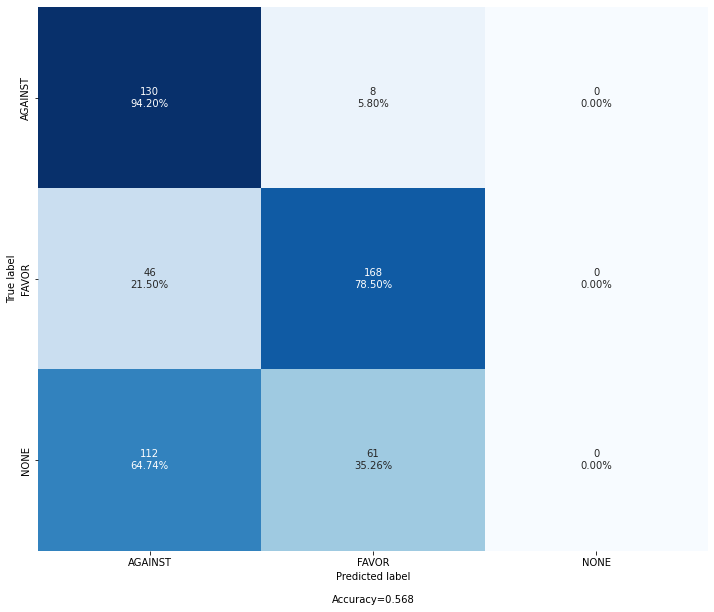

In [103]:
print(classification_report(rs_processed.Stance, rs_processed.yhat_label))
myplots.my_plot_confusionmatrix(rs_processed.Stance, rs_processed.yhat_label)

## Using model with logits as input

In [54]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


In [80]:
# rs_valid, rs_test = train_test_split(rs, test_size=0.2, random_state=4242)

In [53]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

              precision    recall  f1-score   support

     AGAINST       0.77      0.78      0.78        64
       FAVOR       0.72      0.80      0.76        98
        NONE       0.64      0.56      0.60        91

    accuracy                           0.71       253
   macro avg       0.71      0.71      0.71       253
weighted avg       0.70      0.71      0.70       253



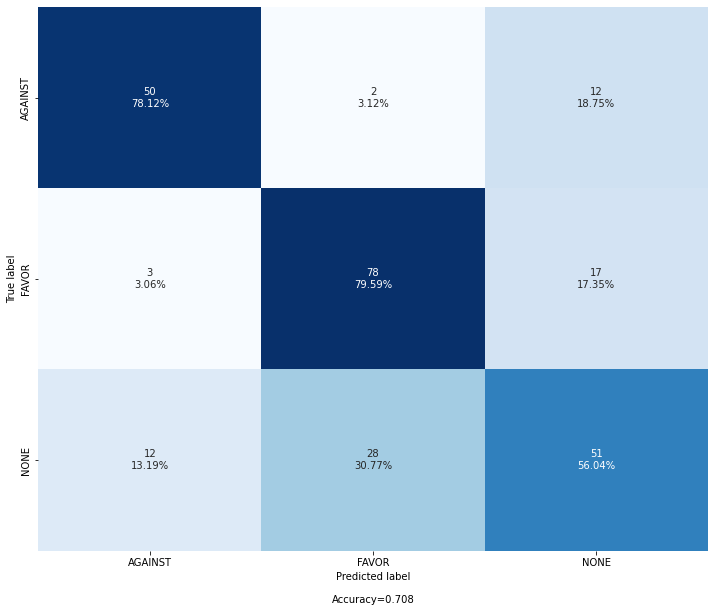

In [125]:
def stance_by_estimator(df_train, df_valid):
    # estimator = SVC()
    estimator = GradientBoostingClassifier()
    # estimator = RandomForestClassifier()
    features = [c for c in df_train.columns if ('_logits_0' in c )]
    # features = [c for c in df_train.columns if ('_logits_0' in c or '_logits_2' in c) and ('against' in c or 'favor' in c)]
    # features = ['against_logits_2', 'favor_logits_2', 'none_logits_1']
    # features = ['against_logits_0', 'favor_logits_0', 'against_logits_2', 'favor_logits_2']
    estimator = estimator.fit(df_train[features], df_train['labels'])
    df_valid['yhat'] = estimator.predict(df_valid[features])
    df_valid['yhat_label'] = df_valid['yhat'].map(lambda v: stance_labels[int(v)])

    print(classification_report(df_valid['Stance'], df_valid['yhat_label']))
    myplots.my_plot_confusionmatrix(df_valid.Stance, df_valid.yhat_label)

    return estimator

# stance_by_estimator(rs_valid, rs_test)    
estimator = stance_by_estimator(rs_test, rs_valid)    

In [126]:
import joblib

joblib.dump(estimator, "../models/stance_as_nli_metalearner_gbc.joblib")

['../models/stance_as_nli_metalearner_gbc.joblib']

# Inference on official data


In [128]:
df_official = pd.read_csv(path.join(run_path("cc98cc00dc214664b1a278a8fc97588c"), "predictions.tsv"), sep='\t')
print(df_official.shape)
df_official.head()

(29865, 12)


,Unnamed: 0,id,claim,text,tweet_text,tweet_text_clean,tgt_lang,Claim2,logits_0,logits_1,logits_2,yhat
0,0,1307558525371965442,school closures,@narendramodi @rajnathsingh Student ka bhi soa...,@narendramodi @rajnathsingh Student ka bhi soa...,@USER @USER Student ka bhi soach lijiye sahab...,1.0,I am against of school closures.,0.917226,0.000257,0.082517,0
1,0,1307558525371965442,school closures,@narendramodi @rajnathsingh Student ka bhi soa...,@narendramodi @rajnathsingh Student ka bhi soa...,@USER @USER Student ka bhi soach lijiye sahab...,1.0,I do not have an opinion of school closures.,0.000066,0.999919,0.000015,1
2,0,1307558525371965442,school closures,@narendramodi @rajnathsingh Student ka bhi soa...,@narendramodi @rajnathsingh Student ka bhi soa...,@USER @USER Student ka bhi soach lijiye sahab...,1.0,I am in favor of school closures.,0.063472,0.000437,0.936091,2
3,1,1247739239879467009,stay at home orders,—échale un vistazo a esto… … a fair piece on...,—échale un vistazo a esto… … a fair piece on...,—échale un vistazo a esto… … a fair piece on c...,1.0,I am against of stay at home orders.,0.007192,0.001708,0.991101,2
4,1,1247739239879467009,stay at home orders,—échale un vistazo a esto… … a fair piece on...,—échale un vistazo a esto… … a fair piece on...,—échale un vistazo a esto… … a fair piece on c...,1.0,I do not have an opinion of stay at home orders.,0.000048,0.999911,0.000040,1


In [129]:
rs_official = group_by_tweet(df_official)
print(rs_official.shape)
rs_official.head()

(9916, 21)


,Unnamed: 0,id,claim,text,tweet_text,tweet_text_clean,tgt_lang,Claim2,logits_0,logits_1,logits_2,yhat,against_logits_0,against_logits_1,against_logits_2,none_logits_0,none_logits_1,none_logits_2,favor_logits_0,favor_logits_1,favor_logits_2
0,4401.0,"1,24344E+18",stay at home orders,StayAtHomeSaveLives KeepYourDistance,StayAtHomeSaveLives KeepYourDistance,StayAtHomeSaveLives KeepYourDistance,1.0,I am against of stay at home orders.,0.984647,0.000310,0.015043,0.0,0.984647,0.000310,0.015043,0.000177,0.999801,0.000022,0.002720,0.000544,0.996736
1,5950.0,"1,26939E+18",stay at home orders,Mass protest is spreading Covid-19. I'd recomm...,Mass protest is spreading Covid-19. I'd recomm...,Mass protest is spreading Covid-19. I'd recomm...,1.0,I am against of stay at home orders.,0.995900,0.000159,0.003941,0.0,0.995900,0.000159,0.003941,0.000172,0.999799,0.000028,0.003872,0.000262,0.995866
2,3226.0,"1,28022E+18",school closures,@realDonaldTrump Yes SchoolReopening SchoolsMu...,@realDonaldTrump Yes SchoolReopening SchoolsMu...,@USER Yes SchoolReopening SchoolsMustOpeninFall,1.0,I am against of school closures.,0.017292,0.001381,0.981327,2.0,0.017292,0.001381,0.981327,0.000063,0.999908,0.000028,0.989203,0.000168,0.010629
3,3753.0,"1,29582E+18",school closures,The @decsped Community Conversations and Liste...,The @decsped Community Conversations and Liste...,The @USER Community Conversations and Listenin...,1.0,I am against of school closures.,0.269008,0.000337,0.730656,2.0,0.269008,0.000337,0.730656,0.000152,0.999832,0.000016,0.466669,0.000409,0.532922
4,7486.0,1236131123966521346,school closures,Most schools wont close unless told to do so b...,Most schools wont close unless told to do so b...,Most schools wont close unless told to do so b...,1.0,I am against of school closures.,0.958509,0.000271,0.041219,0.0,0.958509,0.000271,0.041219,0.000076,0.999901,0.000023,0.003977,0.000414,0.995609


In [133]:
rs_official.to_csv("owl_20220715_task2-stance-asnli_ds-official.tsv", sep='\t')

In [131]:
features = [c for c in rs_official.columns if ('_logits_0' in c )]
rs_official['yhat'] = estimator.predict(rs_official[features])

In [132]:
rs_official

,Unnamed: 0,id,claim,text,tweet_text,tweet_text_clean,tgt_lang,Claim2,logits_0,logits_1,logits_2,yhat,against_logits_0,against_logits_1,against_logits_2,none_logits_0,none_logits_1,none_logits_2,favor_logits_0,favor_logits_1,favor_logits_2
0,4401.0,"1,24344E+18",stay at home orders,StayAtHomeSaveLives KeepYourDistance,StayAtHomeSaveLives KeepYourDistance,StayAtHomeSaveLives KeepYourDistance,1.0,I am against of stay at home orders.,0.984647,0.000310,0.015043,1.0,0.984647,0.000310,0.015043,0.000177,0.999801,0.000022,0.002720,0.000544,0.996736
1,5950.0,"1,26939E+18",stay at home orders,Mass protest is spreading Covid-19. I'd recomm...,Mass protest is spreading Covid-19. I'd recomm...,Mass protest is spreading Covid-19. I'd recomm...,1.0,I am against of stay at home orders.,0.995900,0.000159,0.003941,2.0,0.995900,0.000159,0.003941,0.000172,0.999799,0.000028,0.003872,0.000262,0.995866
2,3226.0,"1,28022E+18",school closures,@realDonaldTrump Yes SchoolReopening SchoolsMu...,@realDonaldTrump Yes SchoolReopening SchoolsMu...,@USER Yes SchoolReopening SchoolsMustOpeninFall,1.0,I am against of school closures.,0.017292,0.001381,0.981327,2.0,0.017292,0.001381,0.981327,0.000063,0.999908,0.000028,0.989203,0.000168,0.010629
3,3753.0,"1,29582E+18",school closures,The @decsped Community Conversations and Liste...,The @decsped Community Conversations and Liste...,The @USER Community Conversations and Listenin...,1.0,I am against of school closures.,0.269008,0.000337,0.730656,1.0,0.269008,0.000337,0.730656,0.000152,0.999832,0.000016,0.466669,0.000409,0.532922
4,7486.0,1236131123966521346,school closures,Most schools wont close unless told to do so b...,Most schools wont close unless told to do so b...,Most schools wont close unless told to do so b...,1.0,I am against of school closures.,0.958509,0.000271,0.041219,1.0,0.958509,0.000271,0.041219,0.000076,0.999901,0.000023,0.003977,0.000414,0.995609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9911,3666.0,1535740487474335744,school closures,SaveOurSchools DontLookAway @LynbrookLTA @nysut,SaveOurSchools DontLookAway @LynbrookLTA @nysut,SaveOurSchools DontLookAway @USER @USER,1.0,I am against of school closures.,0.004567,0.000469,0.994965,0.0,0.004567,0.000469,0.994965,0.000056,0.999898,0.000046,0.995225,0.000136,0.004639
9912,9877.0,1535890993530253313,school closures,We have sent a legal opinion from Aidan O'Neil...,We have sent a legal opinion from Aidan O'Neil...,We have sent a legal opinion from Aidan O'Neil...,1.0,I am against of school closures.,0.023778,0.000993,0.975229,2.0,0.023778,0.000993,0.975229,0.000062,0.999906,0.000032,0.986799,0.000346,0.012855
9913,1929.0,1538138624201572354,face masks,There is no justification for further lockdown...,There is no justification for further lockdown...,There is no justification for further lockdown...,1.0,I am against of face masks.,0.004498,0.000583,0.994918,0.0,0.004498,0.000583,0.994918,0.000043,0.999914,0.000043,0.996279,0.000250,0.003471
9914,612.0,1538802438014062594,face masks,@profamirattaran In fairness our higher death ...,@profamirattaran In fairness our higher death ...,@USER In fairness our higher death rate is be...,1.0,I am against of face masks.,0.082194,0.000333,0.917473,2.0,0.082194,0.000333,0.917473,0.000044,0.999927,0.000029,0.174066,0.000527,0.825407


In [162]:
# ['id',	'text',	'Claim',	'Stance']
submission = rs_official[['id',	'text',	'claim', 'yhat']].copy()
submission['yhat'] = submission.yhat.astype(int)
submission['id'] = submission.id.map(lambda v: int(float(v.replace(',', ''))))
submission
submission = submission.rename({'claim': 'Claim', 'yhat': 'Stance'}, axis=1)
submission

,id,text,Claim,Stance
0,124344000000000002097152,StayAtHomeSaveLives KeepYourDistance,stay at home orders,1
1,126939000000000007602176,Mass protest is spreading Covid-19. I'd recomm...,stay at home orders,2
2,128022000000000006815744,@realDonaldTrump Yes SchoolReopening SchoolsMu...,school closures,2
3,129582000000000000524288,The @decsped Community Conversations and Liste...,school closures,1
4,1236131123966521344,Most schools wont close unless told to do so b...,school closures,1
...,...,...,...,...
9911,1535740487474335744,SaveOurSchools DontLookAway @LynbrookLTA @nysut,school closures,0
9912,1535890993530253312,We have sent a legal opinion from Aidan O'Neil...,school closures,2
9913,1538138624201572352,There is no justification for further lockdown...,face masks,0
9914,1538802438014062592,@profamirattaran In fairness our higher death ...,face masks,2


In [164]:
submission.to_csv("owl_20220715_task2-stance-asnli_submission.tsv", sep='\t', index=False)

# Second run with modified verbalization of phrase-B 
Now do not genarate NEUTRAL examples, just use positive and negative genearated and label as NEUTRAL when the original stance was NONE
Also just use 20% of the training data as a test of few-shot learning

### Results on the test set but prepared for NLI training :: with the augmentation of counter examples
* FAVOR => produce FAVOR -> ENTAIL and AGAINST -> CONTRADICT 
* AGAINST => produce FAVOR -> CONTRADICT and AGAINST -> ENTAIL 
* NONE => produce NEUTRAL for both generated cases

In [29]:
df_test = pd.read_csv("../data/ouputs/633d97053d5241cc8169b65b025fe016_predictions.csv")
df_test['yhat_label'] = df_test['yhat'].map(lambda v: nli_labels[v])
df_test['ytrue_label'] = df_test['ytrue'].map(lambda v: nli_labels[v])
print(df_test.shape)
df_test.head()

(1050, 4)


,yhat,ytrue,yhat_label,ytrue_label
0,0,0,CONTRADICTION,CONTRADICTION
1,2,2,ENTAILMENT,ENTAILMENT
2,0,0,CONTRADICTION,CONTRADICTION
3,0,2,CONTRADICTION,ENTAILMENT
4,0,2,CONTRADICTION,ENTAILMENT


               precision    recall  f1-score   support

CONTRADICTION       0.71      0.72      0.72       352
   ENTAILMENT       0.75      0.62      0.67       352
      NEUTRAL       0.68      0.79      0.73       346

     accuracy                           0.71      1050
    macro avg       0.71      0.71      0.71      1050
 weighted avg       0.71      0.71      0.71      1050



<module 'matplotlib.pyplot' from '/home/owlmx/miniconda3/envs/kaggle/lib/python3.8/site-packages/matplotlib/pyplot.py'>

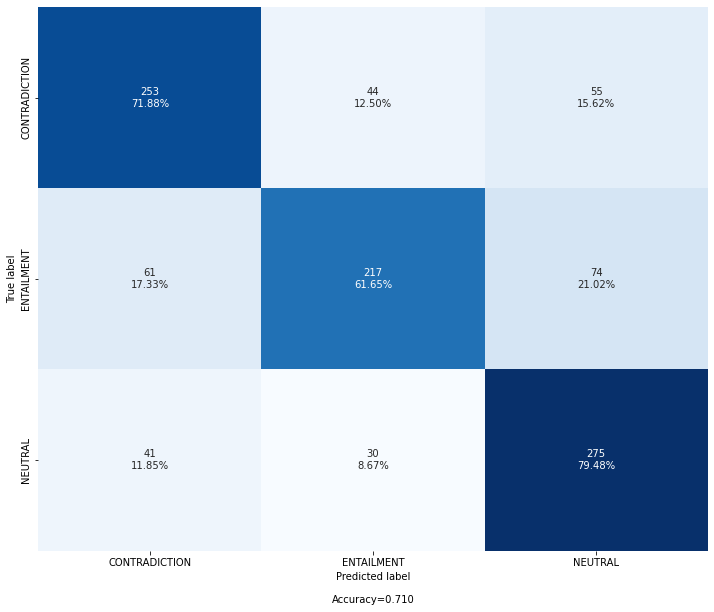

In [30]:
print(classification_report(df_test.ytrue_label, df_test.yhat_label))
myplots.my_plot_confusionmatrix(df_test.ytrue_label, df_test.yhat_label)

### Results directly as an inference task
Asking Querying for the two possible stances (FAVOR, AGAINST) (actually queried also NONE but shouldnt be considered)
So each tweet was evaluated 3 times (3 records)



In [31]:
df_valid = pd.read_csv(path.join(run_path("055da7f74009474f9fdbc2e14cedd24a"), "task2_valid_predictions.tsv"), sep='\t')
df_test = pd.read_csv(path.join(run_path("055da7f74009474f9fdbc2e14cedd24a"), "task2_test_predictions.tsv"), sep='\t')
print(df_valid.shape)
print(df_test.shape)
df_valid.head()

(225, 16)
(1575, 16)


,Unnamed: 0,id,Tweet,Claim,Stance,Premise,tweet_text,tweet_text_clean,tgt_lang,labels,Claim2,groupkey,logits_0,logits_1,logits_2,yhat
0,149,481775,@TeamTrump @realDonaldTrump Save our children ...,school closures,AGAINST,0,@TeamTrump @realDonaldTrump Save our children ...,@USER @USER Save our children - open our scho...,1.0,0.0,I am against of school closures.,AGAINST | school closures,0.043775,0.133518,0.822707,2
1,149,481775,@TeamTrump @realDonaldTrump Save our children ...,school closures,AGAINST,0,@TeamTrump @realDonaldTrump Save our children ...,@USER @USER Save our children - open our scho...,1.0,0.0,I do not have an opinion of school closures.,AGAINST | school closures,0.982933,0.013273,0.003794,0
2,149,481775,@TeamTrump @realDonaldTrump Save our children ...,school closures,AGAINST,0,@TeamTrump @realDonaldTrump Save our children ...,@USER @USER Save our children - open our scho...,1.0,0.0,I am in favor of school closures.,AGAINST | school closures,0.983850,0.007578,0.008572,0
3,300,1895296209,:notes::arrow_forward:Naughty @Officialsoft_ ...,stay at home orders,NONE,0,:notes::arrow_forward:Naughty @Officialsoft_ ...,:notes::arrow_forward:Naughty @USER On Totorim...,1.0,2.0,I am against of stay at home orders.,NONE | stay at home orders,0.001837,0.996541,0.001622,1
4,300,1895296209,:notes::arrow_forward:Naughty @Officialsoft_ ...,stay at home orders,NONE,0,:notes::arrow_forward:Naughty @Officialsoft_ ...,:notes::arrow_forward:Naughty @USER On Totorim...,1.0,2.0,I do not have an opinion of stay at home orders.,NONE | stay at home orders,0.054707,0.940390,0.004902,1


In [35]:
rs_valid = group_by_tweet(df_valid)
rs_test = group_by_tweet(df_test)
rs_valid.head()

,Unnamed: 0,id,Tweet,Claim,Stance,Premise,tweet_text,tweet_text_clean,tgt_lang,labels,Claim2,groupkey,logits_0,logits_1,logits_2,yhat,against_logits_0,against_logits_1,against_logits_2,none_logits_0,none_logits_1,none_logits_2,favor_logits_0,favor_logits_1,favor_logits_2
0,167.0,29919.0,They shouldn't open the school.. keep it onlin...,school closures,FAVOR,0.0,They shouldn't open the school.. keep it onlin...,They shouldn't open the school.. keep it onlin...,1.0,1.0,I am against of school closures.,FAVOR | school closures,0.987584,0.005468,0.006948,0.0,0.987584,0.005468,0.006948,0.992031,0.005352,0.002618,0.011540,0.013895,0.974565
1,119.0,84733.0,"@DanielAndrewsMP To keep businesses running, i...",stay at home orders,AGAINST,0.0,"@DanielAndrewsMP To keep businesses running, i...","@USER To keep businesses running, ignore the ...",1.0,0.0,I am against of stay at home orders.,AGAINST | stay at home orders,0.021570,0.145128,0.833302,2.0,0.021570,0.145128,0.833302,0.226673,0.312256,0.461072,0.872734,0.095242,0.032024
2,364.0,95003.0,@Jayesco78 YES! I’m prepared for civil war aga...,stay at home orders,AGAINST,0.0,@Jayesco78 YES! I’m prepared for civil war aga...,@USER YES! I’m prepared for civil war against...,1.0,0.0,I am against of stay at home orders.,AGAINST | stay at home orders,0.032022,0.185763,0.782215,2.0,0.032022,0.185763,0.782215,0.937045,0.025669,0.037286,0.947837,0.018600,0.033564
3,345.0,113650.0,I wonder if the people concerned about Co2 acc...,face masks,FAVOR,0.0,I wonder if the people concerned about Co2 acc...,I wonder if the people concerned about Co2 acc...,1.0,1.0,I am against of face masks.,FAVOR | face masks,0.377148,0.206548,0.416304,2.0,0.377148,0.206548,0.416304,0.914807,0.039288,0.045905,0.170248,0.060968,0.768784
4,306.0,120408.0,From his LTC and they weren't happy about prov...,stay at home orders,AGAINST,1.0,From his LTC and they weren't happy about prov...,From his LTC and they weren't happy about prov...,1.0,0.0,I am against of stay at home orders.,AGAINST | stay at home orders,0.085085,0.075705,0.839210,2.0,0.085085,0.075705,0.839210,0.949889,0.022311,0.027801,0.381052,0.109592,0.509356


In [50]:
def stance_by_higher_contradiction(df):
    # following the order of the stances [against, favor, none]
    # df['yhat'] = df.apply(lambda e: np.argmax([e['favor_logits_0'], e['against_logits_0'], e['none_logits_1']]), axis=1) 
    df['yhat_label'] = df.apply(lambda e: 'NONE' if (np.argmax([e['against_logits_0'], e['against_logits_1'], e['against_logits_2']])==2 and 
    np.argmax([e['favor_logits_0'], e['favor_logits_1'], e['favor_logits_2']])==2 ) 
    else 'FAVOR' if e['against_logits_0'] > e['favor_logits_0'] else 'AGAINST', axis=1) 
    
    # df['yhat_label'] = df['yhat'].map(lambda v: stance_labels[int(v)])
    return df

def stance_by_only_one_query(df, query='favor'):
    # comtradiction, neutral, entailment
    rs_map = ['AGAINST', 'NONE', 'FAVOR'] if query=='favor' else ['FAVOR', 'NONE', 'AGAINST']
    df['yhat_label'] = df.apply(lambda e: rs_map[np.argmax([e[f'{query}_logits_0'], e[f'{query}_logits_1'], e[f'{query}_logits_2']])] , axis=1) 
    return df

# rs_processed = stance_by_higher_contradiction(rs_test)
# rs_processed = stance_by_only_one_query(rs_test, query='favor')
# rs_processed.head()

              precision    recall  f1-score   support

     AGAINST       0.67      0.58      0.62       138
       FAVOR       0.75      0.72      0.74       214
        NONE       0.69      0.79      0.74       173

    accuracy                           0.71       525
   macro avg       0.70      0.70      0.70       525
weighted avg       0.71      0.71      0.71       525



<module 'matplotlib.pyplot' from '/home/owlmx/miniconda3/envs/kaggle/lib/python3.8/site-packages/matplotlib/pyplot.py'>

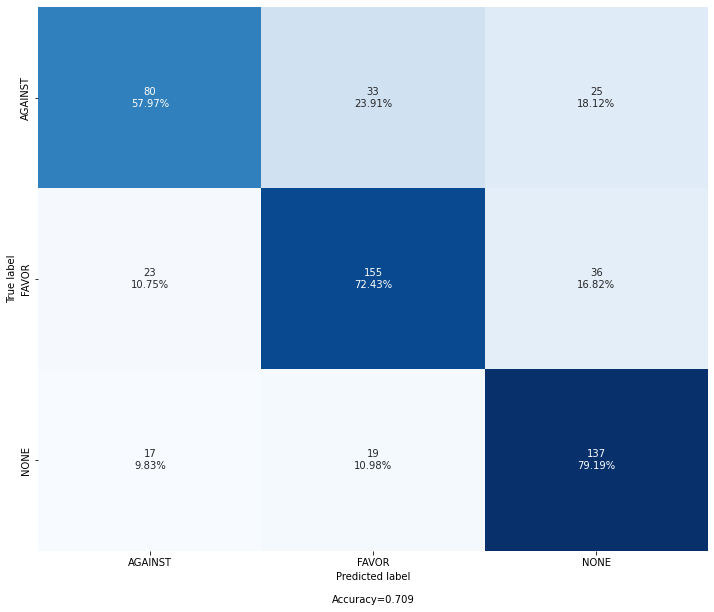

In [48]:
rs_processed = stance_by_only_one_query(rs_test, query='favor')
print(classification_report(rs_processed.Stance, rs_processed.yhat_label))
myplots.my_plot_confusionmatrix(rs_processed.Stance, rs_processed.yhat_label)

              precision    recall  f1-score   support

     AGAINST       0.72      0.46      0.56       138
       FAVOR       0.74      0.79      0.76       214
        NONE       0.66      0.80      0.72       173

    accuracy                           0.71       525
   macro avg       0.71      0.68      0.68       525
weighted avg       0.71      0.71      0.70       525



<module 'matplotlib.pyplot' from '/home/owlmx/miniconda3/envs/kaggle/lib/python3.8/site-packages/matplotlib/pyplot.py'>

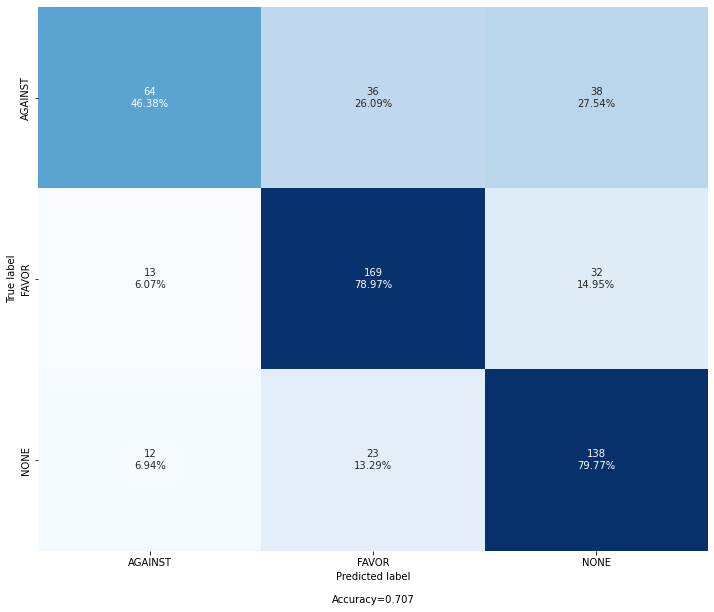

In [51]:
rs_processed = stance_by_only_one_query(rs_test, query='against')
print(classification_report(rs_processed.Stance, rs_processed.yhat_label))
myplots.my_plot_confusionmatrix(rs_processed.Stance, rs_processed.yhat_label)

              precision    recall  f1-score   support

     AGAINST       0.70      0.59      0.64       138
       FAVOR       0.76      0.80      0.78       214
        NONE       0.73      0.77      0.75       173

    accuracy                           0.74       525
   macro avg       0.73      0.72      0.72       525
weighted avg       0.73      0.74      0.73       525



SVC()

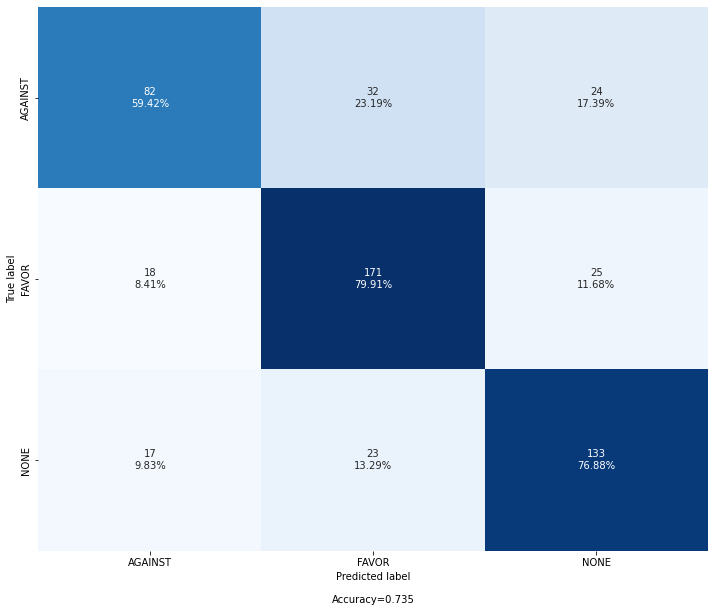

In [60]:
def stance_by_estimator(df_train, df_valid):
    estimator = SVC()
    # estimator = GradientBoostingClassifier()
    # estimator = RandomForestClassifier()
    features = [c for c in df_train.columns if ('_logits_' in c  and ('against' in c or 'favor' in c))]
    estimator = estimator.fit(df_train[features], df_train['labels'])
    df_valid['yhat'] = estimator.predict(df_valid[features])
    df_valid['yhat_label'] = df_valid['yhat'].map(lambda v: stance_labels[int(v)])

    print(classification_report(df_valid['Stance'], df_valid['yhat_label']))
    myplots.my_plot_confusionmatrix(df_valid.Stance, df_valid.yhat_label)

    return estimator

stance_by_estimator(rs_valid, rs_test)
# print(classification_report(rs_processed.Stance, rs_processed.yhat_label))
# myplots.my_plot_confusionmatrix(rs_processed.Stance, rs_processed.yhat_label)    